# T2 SME0104 - Cálculo Numérico
## Recomendação de filmes com SVD

Alunos: 
- Kauê Hunnicutt Bazilli - 11212226
- Matheus Vieira Gonçalves - 11200397
- Pedro Henrique dias Junqueira de Souza - 11294312

# Explicação

O projeto desenvolvido foi um sistema de recomendação de filmes colaborativo baseado em avaliações de filmes feitas por usuários. 
Para tal, foi utilizada a [versão 'small' mais recente do dataset MovieLens](https://grouplens.org/datasets/movielens/latest/), contendo aproximadamente 100836 avaliações de 9724 filmes, feitas por 610 usuários. As avaliações foram coletadas do site MovieLens. O dataset inclui outros dados que não foram utilizados.

O objetivo do sistema desenvolvido é recomendar filmes a usuários similares com base nas avaliações gerais no sistema e nas avaliações feitas pelo usuário que recebe as recomendações.

In [124]:
# Remover os comentários para instalar as bibliotecas necessárias
# import sys
# !{sys.executable} -m pip install sounddevice
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install scipy
# !{sys.executable} -m pip install matplotlib

import pandas as pd
import numpy as np
import scipy as sp
import sounddevice as sd
import matplotlib.pyplot as pp
import math


In [214]:

SAMPLE_RATE = 44000
REC_TIME = 4.0  # segundos
FRAMES = int(REC_TIME * SAMPLE_RATE)
CHANNELS = 1
DELTA_T = 1.0 / SAMPLE_RATE

DTMF_LOW_FREQUENCIES = np.array([697, 770, 852, 941])  # Hz
DTMF_HIGH_FREQUENCIES = np.array([1209, 1336, 1477, 1633])  # Hz

DTMF_FREQUENCIES = np.concatenate(
    [DTMF_LOW_FREQUENCIES, DTMF_HIGH_FREQUENCIES])  # Hz
print(DTMF_FREQUENCIES)


DTMF_DICT = np.array(
    [['1', '2', '3', 'A'],
     ['4', '5', '6', 'B'],
     ['7', '8', '9', 'C'],
     ['*', '0', '#', 'D']])


[ 697  770  852  941 1209 1336 1477 1633]


In [229]:
sound_wave = sd.rec(frames=FRAMES,
                    samplerate=SAMPLE_RATE,
                    channels=CHANNELS)

SOUND_WAVE_ROWS, SOUND_WAVE_COLS = sound_wave.shape
sd.wait()
print(type(sound_wave), sound_wave.shape)


<class 'numpy.ndarray'> (176000, 1)


In [230]:

sd.play(sound_wave, samplerate= SAMPLE_RATE)
sd.wait()

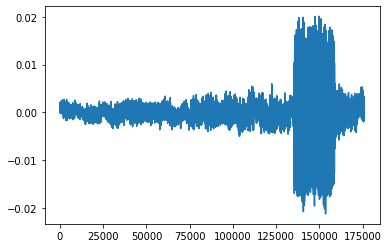

In [231]:
pp.plot(sound_wave)
pp.show()

In [232]:
def mmq(time, j):
    frequency = int(j/2)
    val = DTMF_FREQUENCIES[frequency] * math.pi * 2 * time
    return math.sin(val) if (j % 2 == 0) else math.cos(val)


A = np.zeros(shape=(SOUND_WAVE_ROWS, 16))
for i in range(0, sound_wave.shape[0]):
    for j in range(0, 16):
        A[i][j] = mmq(i * DELTA_T, j)



In [233]:
A_T = A.T

A_T_dot_A = np.dot(A_T, A)
A_T_dot_b = np.dot(A_T, sound_wave)

result = np.linalg.solve(A_T_dot_A, A_T_dot_b)


def get_max_frequency_idxs(frequency_matrix):
    range_array = np.zeros((8))
    j = 0
    for i in range(0, 16, 2):
        curr_frequency = (
            frequency_matrix[i]**2 + frequency_matrix[i+1]**2)**(1/2)
        range_array[j] = curr_frequency
        j += 1
    return range_array[0:4].argmax(axis=0), range_array[4:8].argmax(axis=0)


low_freq_idx, high_freq_idx = get_max_frequency_idxs(result)
print(f"{DTMF_LOW_FREQUENCIES[low_freq_idx]}Hz & {DTMF_HIGH_FREQUENCIES[high_freq_idx]}Hz : {DTMF_DICT[low_freq_idx][high_freq_idx]}");



697Hz & 1336Hz : 2
